In [32]:
import tensorflow as tf
tf.__version__
tf.config.experimental.enable_op_determinism()
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [33]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [34]:
def plot_columns(df):
    colors = plt.cm.tab20(range(df.shape[1]))  

    for i, column in enumerate(df.columns):
        color = colors[i % 24]

        plt.figure()
        plt.plot(df.index, df[column], color=color)
        plt.xlabel('Tempo')
        plt.ylabel('Valor')
        plt.title(column)

    plt.show()

In [35]:
def plot_correlation_matrix(df):
    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix Heatmap")
    plt.show()

In [36]:
tf.keras.backend.clear_session()

In [37]:
subject = 'Amazonas - Consumo de Cimento (t)'
start_index = 0
split_index = 179
window_size = 36
train_split = split_index + 1 - 12

In [38]:
data = pd.read_csv('2003_raw_Amazonas_input.csv')
pd.set_option('display.max_columns', None)
data = data.replace(-1.0, np.nan)
data

,data,Amazonas - PIB - Per Capita,Amazonas - PIB - Preços de Mercado,Amazonas - PIB - Estadual,Amazonas - PIB - Construção Civil,Amazonas - População,Amazonas - INCC (%),Amazonas - IPCA - Variação mensal durante o Plano Real (%),Amazonas - IGP-DI,Amazonas - Taxa Selic (%),Amazonas - IDH - Longevidade,Amazonas - IDH - Renda,Amazonas - IDH - Educação,Amazonas - NFSP - Fluxo Mensal (Milhões de reais),Amazonas - Estoque liquido de capital fixo - (R$),Amazonas - Desemprego,Amazonas - Produção de Cimento (t),Amazonas - Valor,Amazonas - Consumo de Cimento (t)
0,2003-01-01,2.883869e+06,1.518029e+06,0.973688,2.401570e+06,2961801.0,1.70,12.53,2.70,0.082293,0.692,0.608,0.324,3.46,6.098524e+06,12.966133,NaN,0.39,28193.0
1,2003-02-01,2.883869e+06,1.518029e+06,0.973688,2.401570e+06,2961801.0,1.51,2.25,2.17,0.088771,0.692,0.608,0.324,3.59,6.172460e+06,12.966133,NaN,0.39,31226.0
2,2003-03-01,2.883869e+06,1.518029e+06,0.973688,2.401570e+06,2961801.0,1.39,3.86,1.59,0.090733,0.692,0.608,0.324,3.84,6.172460e+06,12.966133,NaN,0.40,33484.0
3,2003-04-01,2.883869e+06,1.518029e+06,0.973688,2.401570e+06,2961801.0,1.38,5.13,1.66,0.092749,0.692,0.608,0.324,3.95,6.172460e+06,12.966133,40381.0,0.40,31596.0
4,2003-05-01,2.883869e+06,1.518029e+06,0.973688,2.401570e+06,2961801.0,0.90,6.15,0.41,0.092758,0.692,0.608,0.324,4.06,6.172460e+06,12.966133,152727.0,0.40,32919.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,2019-08-01,4.166391e+06,7.030129e+06,1.021021,1.673511e+06,4080611.0,0.58,2.42,-0.01,0.024620,0.790,0.680,0.740,0.69,7.827728e+06,12.300000,542222.0,0.55,53567.0
200,2019-09-01,4.166391e+06,7.030129e+06,1.021021,1.673511e+06,4080611.0,0.42,2.54,-0.51,0.022751,0.790,0.680,0.740,0.62,7.827728e+06,12.000000,76292.0,0.55,46239.0
201,2019-10-01,4.166391e+06,7.030129e+06,1.021021,1.673511e+06,4080611.0,0.46,2.49,0.50,0.022035,0.790,0.680,0.740,0.59,7.827728e+06,11.900000,225444.0,0.55,51066.0
202,2019-11-01,4.166391e+06,7.030129e+06,1.021021,1.673511e+06,4080611.0,0.18,2.60,0.55,0.020790,0.790,0.680,0.740,0.57,7.827728e+06,11.700000,114946.0,0.55,51684.0


In [39]:
# Shift para prever futuro e não presente
target_data = data[subject].shift(-24)
target_data = target_data/1000
target_data

0      39.696000
1      56.004938
2      39.376000
3      59.327426
4      40.816000
         ...    
199          NaN
200          NaN
201          NaN
202          NaN
203          NaN
Name: Amazonas - Consumo de Cimento (t), Length: 204, dtype: float64

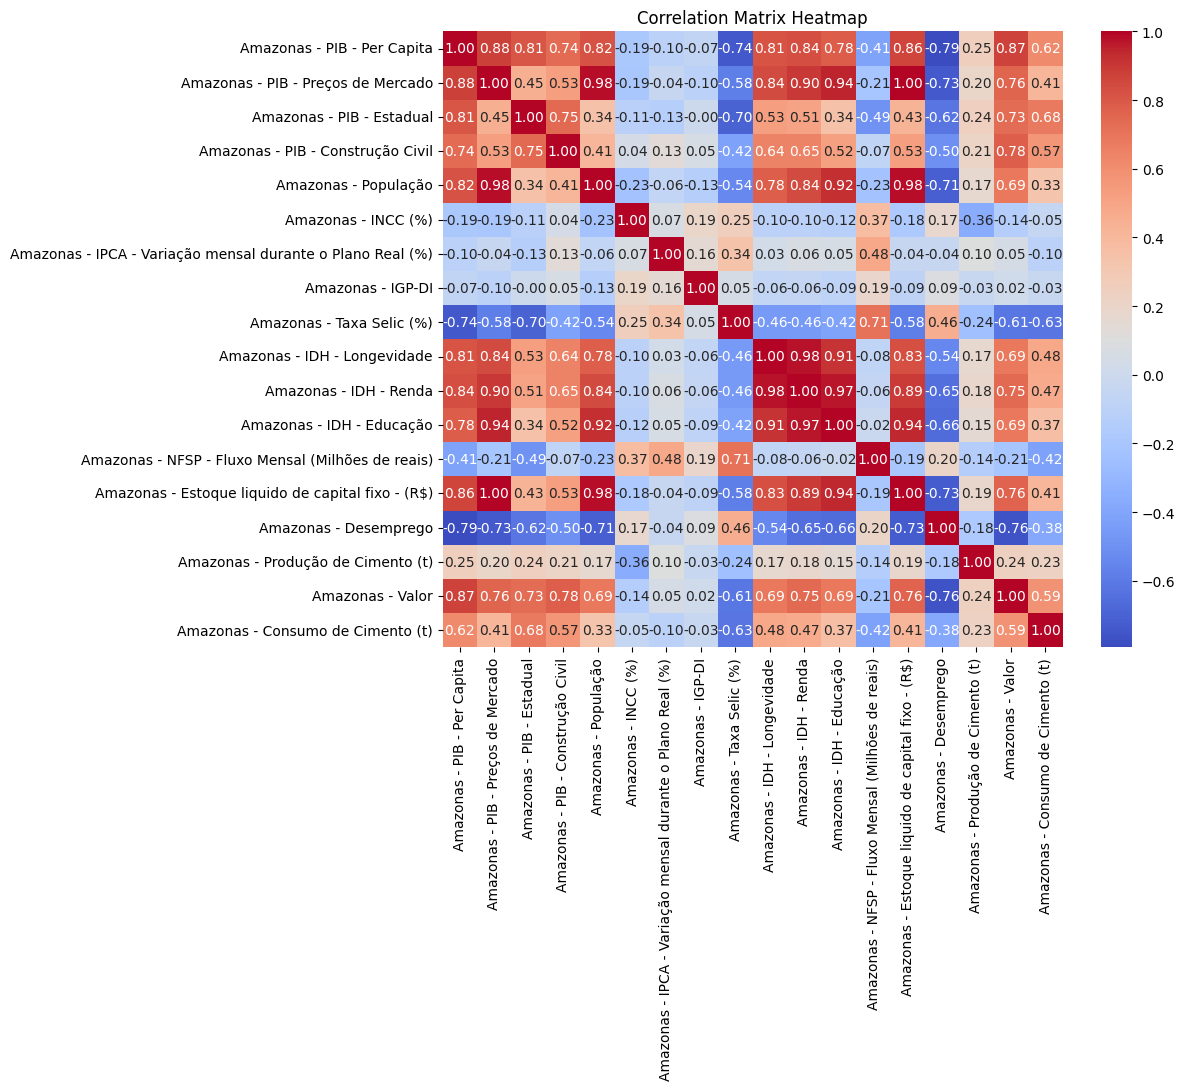

In [40]:
plot_data = data.iloc[:split_index + 1,1:]
plot_correlation_matrix(plot_data)

In [41]:
input_data = data.iloc[:split_index + 1,1:-1]
# mean = np.mean(input_data, axis=0)
# stddev =  np.std(input_data, axis=0)
# input_data = ((input_data - mean) /stddev)
scaler=MinMaxScaler()
scaled_data = scaler.fit_transform(input_data)
input_data = pd.DataFrame(scaled_data, columns=input_data.columns)
input_data = input_data.fillna(-1.0)
input_data

,Amazonas - PIB - Per Capita,Amazonas - PIB - Preços de Mercado,Amazonas - PIB - Estadual,Amazonas - PIB - Construção Civil,Amazonas - População,Amazonas - INCC (%),Amazonas - IPCA - Variação mensal durante o Plano Real (%),Amazonas - IGP-DI,Amazonas - Taxa Selic (%),Amazonas - IDH - Longevidade,Amazonas - IDH - Renda,Amazonas - IDH - Educação,Amazonas - NFSP - Fluxo Mensal (Milhões de reais),Amazonas - Estoque liquido de capital fixo - (R$),Amazonas - Desemprego,Amazonas - Produção de Cimento (t),Amazonas - Valor
0,0.000000,0.0,0.000000,0.364929,0.0,0.611285,1.000000,1.000000,0.840228,0.000000,0.000000,0.0,0.854722,0.00000,0.685740,-1.000000,0.330357
1,0.000000,0.0,0.000000,0.364929,0.0,0.551724,0.153909,0.865482,0.939126,0.000000,0.000000,0.0,0.886199,0.04293,0.685740,-1.000000,0.330357
2,0.000000,0.0,0.000000,0.364929,0.0,0.514107,0.286420,0.718274,0.969081,0.000000,0.000000,0.0,0.946731,0.04293,0.685740,-1.000000,0.356618
3,0.000000,0.0,0.000000,0.364929,0.0,0.510972,0.390947,0.736041,0.999866,0.000000,0.000000,0.0,0.973366,0.04293,0.685740,0.050110,0.356618
4,0.000000,0.0,0.000000,0.364929,0.0,0.360502,0.474897,0.418782,1.000000,0.000000,0.000000,0.0,1.000000,0.04293,0.685740,0.267351,0.356618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.672796,1.0,0.093512,0.248163,1.0,0.172414,0.086420,0.238579,0.161726,0.778761,0.898551,1.0,0.198547,1.00000,0.576068,0.988139,0.495798
176,0.672796,1.0,0.093512,0.248163,1.0,0.191223,0.102058,0.375635,0.114340,0.778761,0.898551,1.0,0.186441,1.00000,0.576068,0.207900,0.495798
177,0.672796,1.0,0.093512,0.248163,1.0,0.097179,0.115226,0.472081,0.069721,0.778761,0.898551,1.0,0.174334,1.00000,0.576068,0.257337,0.489496
178,0.672796,1.0,0.093512,0.248163,1.0,0.175549,0.150617,0.340102,0.050532,0.778761,0.898551,1.0,0.174334,1.00000,0.586354,0.176101,0.645483


In [42]:
# input para treinamento
train_input = input_data.iloc[start_index:train_split]
train_input

,Amazonas - PIB - Per Capita,Amazonas - PIB - Preços de Mercado,Amazonas - PIB - Estadual,Amazonas - PIB - Construção Civil,Amazonas - População,Amazonas - INCC (%),Amazonas - IPCA - Variação mensal durante o Plano Real (%),Amazonas - IGP-DI,Amazonas - Taxa Selic (%),Amazonas - IDH - Longevidade,Amazonas - IDH - Renda,Amazonas - IDH - Educação,Amazonas - NFSP - Fluxo Mensal (Milhões de reais),Amazonas - Estoque liquido de capital fixo - (R$),Amazonas - Desemprego,Amazonas - Produção de Cimento (t),Amazonas - Valor
0,0.000000,0.000000,0.000000,0.364929,0.000000,0.611285,1.000000,1.000000,0.840228,0.000000,0.0,0.000000,0.854722,0.000000,0.685740,-1.000000,0.330357
1,0.000000,0.000000,0.000000,0.364929,0.000000,0.551724,0.153909,0.865482,0.939126,0.000000,0.0,0.000000,0.886199,0.042930,0.685740,-1.000000,0.330357
2,0.000000,0.000000,0.000000,0.364929,0.000000,0.514107,0.286420,0.718274,0.969081,0.000000,0.0,0.000000,0.946731,0.042930,0.685740,-1.000000,0.356618
3,0.000000,0.000000,0.000000,0.364929,0.000000,0.510972,0.390947,0.736041,0.999866,0.000000,0.0,0.000000,0.973366,0.042930,0.685740,0.050110,0.356618
4,0.000000,0.000000,0.000000,0.364929,0.000000,0.360502,0.474897,0.418782,1.000000,0.000000,0.0,0.000000,1.000000,0.042930,0.685740,0.267351,0.356618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,0.757133,0.944296,0.260662,0.382933,0.939097,0.231975,0.376955,0.215736,0.385830,0.778761,1.0,0.948187,0.418886,0.991571,0.267460,-1.000000,0.494748
164,0.757133,0.944296,0.260662,0.382933,0.939097,0.169279,0.414815,0.423858,0.385830,0.778761,1.0,0.948187,0.406780,0.991571,0.277747,-1.000000,0.494748
165,0.757133,0.944296,0.260662,0.382933,0.939097,0.181818,0.422222,0.322335,0.385830,0.778761,1.0,0.948187,0.409201,0.991571,0.288034,-1.000000,0.494748
166,0.757133,0.944296,0.260662,0.382933,0.939097,0.144201,0.444444,0.347716,0.380510,0.778761,1.0,0.948187,0.384988,0.991571,0.288034,-1.000000,0.494748


In [43]:
# Alvo para treinamento
train_target = target_data.iloc[start_index:train_split]
train_target

0      39.696000
1      56.004938
2      39.376000
3      59.327426
4      40.816000
         ...    
163    23.387000
164    38.399000
165    39.652000
166    40.204000
167    21.625000
Name: Amazonas - Consumo de Cimento (t), Length: 168, dtype: float64

In [44]:
def create_batches(t_input, t_target, window_size, start_from):
    
    X_batches = []
    y_batches = []

    train_input_values = t_input.values 

    for i in range(len(t_input) - window_size):
        
        X_window = train_input_values[i:i+window_size, :]
        y_target = t_target[start_from+i+window_size]

        X_batches.append(X_window)
        y_batches.append(y_target)

    return np.array(X_batches), np.array(y_batches)

In [45]:
reshaped_train, reshaped_target = create_batches(train_input, 
                                                 train_target, 
                                                 window_size, 
                                                 start_index)
reshaped_train.shape

(132, 36, 17)

In [46]:
# input para treinamento
test_input = input_data.iloc[train_split - window_size:split_index + 1]
test_input

,Amazonas - PIB - Per Capita,Amazonas - PIB - Preços de Mercado,Amazonas - PIB - Estadual,Amazonas - PIB - Construção Civil,Amazonas - População,Amazonas - INCC (%),Amazonas - IPCA - Variação mensal durante o Plano Real (%),Amazonas - IGP-DI,Amazonas - Taxa Selic (%),Amazonas - IDH - Longevidade,Amazonas - IDH - Renda,Amazonas - IDH - Educação,Amazonas - NFSP - Fluxo Mensal (Milhões de reais),Amazonas - Estoque liquido de capital fixo - (R$),Amazonas - Desemprego,Amazonas - Produção de Cimento (t),Amazonas - Valor
132,1.000000,0.876994,0.720283,1.000000,0.813682,0.109718,0.455144,0.489848,0.155826,0.690265,1.000000,0.870466,0.215496,0.796254,0.102869,0.519218,0.960609
133,1.000000,0.876994,0.720283,1.000000,0.813682,0.354232,0.013992,0.416244,0.170859,0.690265,1.000000,0.870466,0.203390,0.895320,0.154304,-1.000000,0.960609
134,1.000000,0.876994,0.720283,1.000000,0.813682,0.181818,0.070782,0.530457,0.184736,0.690265,1.000000,0.870466,0.198547,0.895320,0.185165,-1.000000,0.986870
135,1.000000,0.876994,0.720283,1.000000,0.813682,0.166144,0.148148,0.690355,0.197075,0.690265,1.000000,0.870466,0.220339,0.895320,0.164591,-1.000000,0.986870
136,1.000000,0.876994,0.720283,1.000000,0.813682,0.354232,0.204115,0.428934,0.209373,0.690265,1.000000,0.870466,0.259080,0.895320,0.144017,-1.000000,0.986870
137,1.000000,0.876994,0.720283,1.000000,0.813682,0.721003,0.242798,0.200508,0.210740,0.690265,1.000000,0.870466,0.273608,0.895320,0.123443,-1.000000,0.986870
138,1.000000,0.876994,0.720283,1.000000,0.813682,0.285266,0.277366,0.154822,0.210740,0.690265,1.000000,0.870466,0.268765,0.895320,0.113156,-1.000000,0.986870
139,1.000000,0.876994,0.720283,1.000000,0.813682,0.313480,0.278189,0.175127,0.210740,0.690265,1.000000,0.870466,0.242131,0.895320,0.092582,-1.000000,0.986870
140,1.000000,0.876994,0.720283,1.000000,0.813682,0.103448,0.299588,0.329949,0.210818,0.690265,1.000000,0.870466,0.234867,0.895320,0.072008,-1.000000,0.986870
141,1.000000,0.876994,0.720283,1.000000,0.813682,0.125392,0.348148,0.319797,0.210740,0.690265,1.000000,0.870466,0.249395,0.895320,0.051435,-1.000000,0.986870


In [47]:
reshaped_test, reshaped_test_target = create_batches(test_input, 
                                                     target_data, 
                                                     window_size, 
                                                     train_split - window_size)
reshaped_test.shape 

(12, 36, 17)

In [48]:
def validation_splitter(arr, div_factor, add_factor=0):
    split_factor = len(arr) // div_factor
    positions_to_drop_index = []
    positions_to_drop = []
    for i in range(split_factor):
        pos = len(arr) - (i * div_factor + 1)
        positions_to_drop_index.append(pos)
        positions_to_drop.append(pos + add_factor)
    
    arr_droped = arr[positions_to_drop]
    arr_result = np.delete(arr, positions_to_drop_index, axis=0)
    
    return arr_result, arr_droped

In [49]:
# Rede Neural Recorrente com optmizador Estocástico
def lstm_model(train_input, train_target, want_verbose=1, seed=0):
    if seed != 0:
        random.seed(seed)
        np.random.seed(seed)
        tf.random.set_seed(seed)
    # Aṕos 500 epochs sem grandes melhoras no val_loss, interrompe.
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                      patience=500, 
                                                      verbose=want_verbose, 
                                                      restore_best_weights=True,
                                                      start_from_epoch=500)
    # Método estocástico e learning rate=0.005
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.005)
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(36, activation='tanh', 
                            return_sequences=True, 
                            kernel_regularizer=tf.keras.regularizers.l2(0.01),  
                            input_shape=(reshaped_train.shape[1], reshaped_train.shape[2])),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.LSTM(72, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer=optimizer,
                  loss='mean_squared_error')    
    history = model.fit(train_input, 
                        train_target, 
                        epochs=10000,
                        validation_split=0.2,
                        callbacks=[early_stopping], 
                        verbose=want_verbose)
    return model, history

In [50]:
def get_a_good_seed(train_input, train_target, test_input, test_target):

    random_seeds = [random.randint(0, 2**32 - 1) for _ in range(10)]
    print(random_seeds)

    best_loss = float('inf')
    winner_seed = None
    i = 0
    for seed in random_seeds:
        print(f"\n\nStep: {i} ___________________________________________")
        i += 1

        model, history = lstm_model(train_input, train_target, want_verbose=0, seed=seed)
        current_loss = min(history.history['val_loss'][500:])
        print(f"val_loss: {current_loss}")

        if current_loss < best_loss:
            best_loss = current_loss
            winner_seed = seed
            print(f"winner_seed: {winner_seed}")
            if winner_seed == 0.0:
                return winner_seed

    return winner_seed

In [51]:
winner_seed = get_a_good_seed(reshaped_train, reshaped_target, reshaped_test, reshaped_test_target)
print(f"\n\nfinal_seed: {winner_seed}")

[2819883095, 3291564961, 3486758620, 1767685433, 3867695267, 3335253071, 35742919, 1241259976, 648730621, 805852948]


Step: 0 ___________________________________________
val_loss: 266.30291748046875
winner_seed: 2819883095


Step: 1 ___________________________________________
val_loss: 306.5950012207031


Step: 2 ___________________________________________
val_loss: 280.3681640625


Step: 3 ___________________________________________
val_loss: 324.2953186035156


Step: 4 ___________________________________________
val_loss: 342.631103515625


Step: 5 ___________________________________________
val_loss: 304.9305419921875


Step: 6 ___________________________________________
val_loss: 275.10284423828125


Step: 7 ___________________________________________
val_loss: 250.7405548095703
winner_seed: 1241259976


Step: 8 ___________________________________________
val_loss: 288.90777587890625


Step: 9 ___________________________________________
val_loss: 303.01934814453125


final_seed: 1

In [52]:
trained_model, history = lstm_model(reshaped_train, 
                                    reshaped_target, 
                                    want_verbose=1, 
                                    seed=winner_seed)
# 282560761

Epoch 1/10000
4/4 [==============================] - 2s 138ms/step - loss: 4345.3843 - val_loss: 449.7104
Epoch 2/10000
4/4 [==============================] - 0s 11ms/step - loss: 335.9771 - val_loss: 999.4210
Epoch 3/10000
4/4 [==============================] - 0s 11ms/step - loss: 291.2130 - val_loss: 774.5633
Epoch 4/10000
4/4 [==============================] - 0s 11ms/step - loss: 278.1927 - val_loss: 1094.1825
Epoch 5/10000
4/4 [==============================] - 0s 11ms/step - loss: 276.9014 - val_loss: 815.6683
Epoch 6/10000
4/4 [==============================] - 0s 12ms/step - loss: 286.8726 - val_loss: 765.0982
Epoch 7/10000
4/4 [==============================] - 0s 11ms/step - loss: 289.8708 - val_loss: 732.4838
Epoch 8/10000
4/4 [==============================] - 0s 11ms/step - loss: 291.6340 - val_loss: 818.5546
Epoch 9/10000
4/4 [==============================] - 0s 12ms/step - loss: 280.6701 - val_loss: 802.9562
Epoch 10/10000
4/4 [==============================] - 0s 12ms

Epoch 79/10000
4/4 [==============================] - 0s 12ms/step - loss: 282.0397 - val_loss: 1407.7998
Epoch 80/10000
4/4 [==============================] - 0s 11ms/step - loss: 296.7744 - val_loss: 1357.1073
Epoch 81/10000
4/4 [==============================] - 0s 13ms/step - loss: 293.0024 - val_loss: 1118.2393
Epoch 82/10000
4/4 [==============================] - 0s 11ms/step - loss: 279.1772 - val_loss: 846.2744
Epoch 83/10000
4/4 [==============================] - 0s 11ms/step - loss: 282.2818 - val_loss: 1095.2507
Epoch 84/10000
4/4 [==============================] - 0s 12ms/step - loss: 300.2046 - val_loss: 1416.5295
Epoch 85/10000
4/4 [==============================] - 0s 12ms/step - loss: 290.5572 - val_loss: 774.1689
Epoch 86/10000
4/4 [==============================] - 0s 11ms/step - loss: 281.9546 - val_loss: 816.8872
Epoch 87/10000
4/4 [==============================] - 0s 12ms/step - loss: 282.4098 - val_loss: 659.7224
Epoch 88/10000
4/4 [==============================

4/4 [==============================] - 0s 10ms/step - loss: 183.8555 - val_loss: 370.7448
Epoch 234/10000
4/4 [==============================] - 0s 12ms/step - loss: 182.3836 - val_loss: 387.0074
Epoch 235/10000
4/4 [==============================] - 0s 10ms/step - loss: 174.9800 - val_loss: 348.1193
Epoch 236/10000
4/4 [==============================] - 0s 10ms/step - loss: 169.8930 - val_loss: 418.5446
Epoch 237/10000
4/4 [==============================] - 0s 12ms/step - loss: 169.5742 - val_loss: 420.9259
Epoch 238/10000
4/4 [==============================] - 0s 9ms/step - loss: 172.6615 - val_loss: 405.2301
Epoch 239/10000
4/4 [==============================] - 0s 10ms/step - loss: 166.7514 - val_loss: 405.2288
Epoch 240/10000
4/4 [==============================] - 0s 9ms/step - loss: 184.4761 - val_loss: 340.9705
Epoch 241/10000
4/4 [==============================] - 0s 10ms/step - loss: 231.3120 - val_loss: 374.5438
Epoch 242/10000
4/4 [==============================] - 0s 9ms/st

4/4 [==============================] - 0s 11ms/step - loss: 150.9367 - val_loss: 297.3365
Epoch 388/10000
4/4 [==============================] - 0s 11ms/step - loss: 169.0311 - val_loss: 280.8288
Epoch 389/10000
4/4 [==============================] - 0s 11ms/step - loss: 167.1071 - val_loss: 291.0091
Epoch 390/10000
4/4 [==============================] - 0s 12ms/step - loss: 161.9674 - val_loss: 256.1315
Epoch 391/10000
4/4 [==============================] - 0s 12ms/step - loss: 182.5416 - val_loss: 254.5371
Epoch 392/10000
4/4 [==============================] - 0s 12ms/step - loss: 166.8569 - val_loss: 274.1299
Epoch 393/10000
4/4 [==============================] - 0s 11ms/step - loss: 144.7012 - val_loss: 248.0808
Epoch 394/10000
4/4 [==============================] - 0s 11ms/step - loss: 189.8337 - val_loss: 383.2018
Epoch 395/10000
4/4 [==============================] - 0s 11ms/step - loss: 186.7902 - val_loss: 284.5240
Epoch 396/10000
4/4 [==============================] - 0s 11ms

4/4 [==============================] - 0s 11ms/step - loss: 105.9656 - val_loss: 258.0237
Epoch 542/10000
4/4 [==============================] - 0s 13ms/step - loss: 112.2852 - val_loss: 288.1072
Epoch 543/10000
4/4 [==============================] - 0s 12ms/step - loss: 105.1039 - val_loss: 273.5532
Epoch 544/10000
4/4 [==============================] - 0s 11ms/step - loss: 95.4264 - val_loss: 286.8405
Epoch 545/10000
4/4 [==============================] - 0s 11ms/step - loss: 108.0801 - val_loss: 326.0852
Epoch 546/10000
4/4 [==============================] - 0s 12ms/step - loss: 90.2681 - val_loss: 313.3094
Epoch 547/10000
4/4 [==============================] - 0s 11ms/step - loss: 94.7338 - val_loss: 266.6754
Epoch 548/10000
4/4 [==============================] - 0s 11ms/step - loss: 94.2193 - val_loss: 303.7598
Epoch 549/10000
4/4 [==============================] - 0s 11ms/step - loss: 89.8918 - val_loss: 316.8551
Epoch 550/10000
4/4 [==============================] - 0s 11ms/step

Epoch 619/10000
4/4 [==============================] - 0s 12ms/step - loss: 131.8770 - val_loss: 276.3174
Epoch 620/10000
4/4 [==============================] - 0s 11ms/step - loss: 130.5659 - val_loss: 276.1103
Epoch 621/10000
4/4 [==============================] - 0s 11ms/step - loss: 115.0282 - val_loss: 358.1695
Epoch 622/10000
4/4 [==============================] - 0s 12ms/step - loss: 131.3262 - val_loss: 321.3485
Epoch 623/10000
4/4 [==============================] - 0s 11ms/step - loss: 116.9233 - val_loss: 291.4988
Epoch 624/10000
4/4 [==============================] - 0s 12ms/step - loss: 136.6843 - val_loss: 290.4095
Epoch 625/10000
4/4 [==============================] - 0s 10ms/step - loss: 126.2497 - val_loss: 318.1098
Epoch 626/10000
4/4 [==============================] - 0s 12ms/step - loss: 132.6349 - val_loss: 287.4803
Epoch 627/10000
4/4 [==============================] - 0s 11ms/step - loss: 114.8138 - val_loss: 289.5562
Epoch 628/10000
4/4 [=========================

4/4 [==============================] - 0s 11ms/step - loss: 34.2572 - val_loss: 265.5659
Epoch 775/10000
4/4 [==============================] - 0s 11ms/step - loss: 30.3809 - val_loss: 262.4657
Epoch 776/10000
4/4 [==============================] - 0s 11ms/step - loss: 27.9556 - val_loss: 275.1842
Epoch 777/10000
4/4 [==============================] - 0s 11ms/step - loss: 29.7631 - val_loss: 267.1603
Epoch 778/10000
4/4 [==============================] - 0s 11ms/step - loss: 27.2032 - val_loss: 265.1678
Epoch 779/10000
4/4 [==============================] - 0s 11ms/step - loss: 28.7760 - val_loss: 261.0851
Epoch 780/10000
4/4 [==============================] - 0s 11ms/step - loss: 22.8794 - val_loss: 270.9568
Epoch 781/10000
4/4 [==============================] - 0s 11ms/step - loss: 26.0266 - val_loss: 261.7893
Epoch 782/10000
4/4 [==============================] - 0s 11ms/step - loss: 24.7385 - val_loss: 260.9683
Epoch 783/10000
4/4 [==============================] - 0s 12ms/step - l

4/4 [==============================] - 0s 12ms/step - loss: 24.9127 - val_loss: 273.8796
Epoch 931/10000
4/4 [==============================] - 0s 12ms/step - loss: 23.0412 - val_loss: 279.9909
Epoch 932/10000
4/4 [==============================] - 0s 11ms/step - loss: 20.7846 - val_loss: 265.9385
Epoch 933/10000
4/4 [==============================] - 0s 12ms/step - loss: 19.9504 - val_loss: 330.7450
Epoch 934/10000
4/4 [==============================] - 0s 11ms/step - loss: 17.5293 - val_loss: 313.5331
Epoch 935/10000
4/4 [==============================] - 0s 12ms/step - loss: 14.5806 - val_loss: 321.8354
Epoch 936/10000
4/4 [==============================] - 0s 11ms/step - loss: 16.4011 - val_loss: 314.4990
Epoch 937/10000
4/4 [==============================] - 0s 12ms/step - loss: 16.1127 - val_loss: 308.3301
Epoch 938/10000
4/4 [==============================] - 0s 12ms/step - loss: 14.2644 - val_loss: 305.2622
Epoch 939/10000
4/4 [==============================] - 0s 11ms/step - l

4/4 [==============================] - 0s 13ms/step - loss: 12.3638 - val_loss: 297.4736
Epoch 1009/10000
4/4 [==============================] - 0s 12ms/step - loss: 13.8318 - val_loss: 291.4543
Epoch 1010/10000
4/4 [==============================] - 0s 11ms/step - loss: 13.7574 - val_loss: 281.4566
Epoch 1011/10000
4/4 [==============================] - 0s 10ms/step - loss: 16.9568 - val_loss: 284.6029
Epoch 1012/10000
4/4 [==============================] - 0s 11ms/step - loss: 12.5420 - val_loss: 282.2248
Epoch 1013/10000
4/4 [==============================] - 0s 11ms/step - loss: 16.2929 - val_loss: 286.4772
Epoch 1014/10000
4/4 [==============================] - 0s 10ms/step - loss: 12.3266 - val_loss: 281.8666
Epoch 1015/10000
4/4 [==============================] - 0s 11ms/step - loss: 11.0029 - val_loss: 301.3194
Epoch 1016/10000
4/4 [==============================] - 0s 11ms/step - loss: 11.9309 - val_loss: 287.1787
Epoch 1017/10000
4/4 [==============================] - 0s 11ms

4/4 [==============================] - 0s 12ms/step - loss: 11.8220 - val_loss: 278.8764
Epoch 1163/10000
4/4 [==============================] - 0s 11ms/step - loss: 10.4859 - val_loss: 320.1404
Epoch 1164/10000
4/4 [==============================] - 0s 11ms/step - loss: 40.5568 - val_loss: 300.1635
Epoch 1165/10000
4/4 [==============================] - 0s 11ms/step - loss: 16.2877 - val_loss: 290.7299
Epoch 1166/10000
4/4 [==============================] - 0s 13ms/step - loss: 12.1817 - val_loss: 290.8489
Epoch 1167/10000
4/4 [==============================] - 0s 12ms/step - loss: 10.6606 - val_loss: 277.9021
Epoch 1168/10000
4/4 [==============================] - 0s 12ms/step - loss: 10.3186 - val_loss: 277.6577
Epoch 1169/10000
4/4 [==============================] - 0s 12ms/step - loss: 9.7201 - val_loss: 271.2391
Epoch 1170/10000
4/4 [==============================] - 0s 11ms/step - loss: 11.7865 - val_loss: 292.7231
Epoch 1171/10000
4/4 [==============================] - 0s 12ms/

In [53]:
def mae_mape_calculator(model, test_input, test_target, start_target):
    
    errors = []
    error_percent = []
    results_data = []

    for i in range(len(test_target)):
        prediction = model.predict(test_input[i:i+1])
        target = test_target[start_target + i]
        error = np.abs(prediction - target)
        errors.append(error)
        error_percent.append(error/target)
        results_data.append([f"Month-{i + 1}", 
                             prediction[0][0], 
                             target, 
                             error[0][0]])

    df_results = pd.DataFrame(results_data, columns=["Month", "Prediction", "Target", "Error"])

    mae = np.mean(errors)
    mape = np.mean(error_percent) 

    return df_results, mae, mape

In [54]:
df_results, mae, mape = mae_mape_calculator(trained_model, 
                                            reshaped_test, 
                                            reshaped_test_target, 
                                            start_index)
pd.set_option('display.max_columns', None)
df_results.T

1/1 [==============================] - 0s 17ms/step


,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,37.303886,36.898685,36.776398,36.671162,36.219051,36.074989,35.871838,35.70042,36.547932,36.36768,36.120224,35.918598
Target,42.731,36.026,34.609,40.787,39.823,39.957,52.048,53.567,46.239,51.066,51.684,44.907
Error,5.427113,0.872684,2.167397,4.115837,3.603951,3.882011,16.176163,17.866581,9.691067,14.698322,15.563774,8.988403


In [55]:
display(mae)
display(mape)

8.587775

0.17878796

In [56]:
def year_mae_mape_calculator(model, test_input, test_target, start_target):
    
    errors = []
    error_percent = []
    
    target_sum = 0
    prediction_sum = 0
    
    for i in range(len(test_target)):
        if i % 12 == 0 and i != 0:
            error = np.abs(target_sum - prediction_sum)
            errors.append(error)
            error_percent.append(error / target_sum)
            print(f"Ano-{i%12}: |Prediction{prediction_sum} - Target[{target_sum}]| =  Error: {error}; MAPE:{abs(prediction_sum - target_sum)/target_sum}")
            target_sum = 0
            prediction_sum = 0
            
        prediction = model.predict(test_input[i:i+1])
        target_sum += test_target[start_target + i]
        prediction_sum += prediction
        
    error = np.abs(target_sum - prediction_sum)
    errors.append(error)
    error_percent.append(error / target_sum)
    print(f"Ano-{i%12}: |Prediction{prediction_sum} - Target[{target_sum}]| =  Error: {error}; MAPE:{abs(prediction_sum - target_sum)/target_sum}")
        
    mae = np.mean(errors)
    mape = np.mean(error_percent) 

    return errors, mae, mape

In [57]:
errors, mae, mape = year_mae_mape_calculator(trained_model, 
                                             reshaped_test, 
                                             reshaped_test_target, 
                                             start_index)
display(errors)
display(mae)
display(mape)

1/1 [==============================] - 0s 18ms/step
Ano-11: |Prediction[[436.47092]] - Target[533.444]| =  Error: [[96.97305]]; MAPE:[[0.18178676]]


[array([[96.97305]], dtype=float32)]

96.97305

0.18178676